In [5]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy

2.17.1


In [2]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot']

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

X_train = X_train / 255.0
X_test = X_test / 255.0

"""model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10)
])"""
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    #Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
model.summary()

inputs = Input(shape=(28, 28))
x_1 = Flatten()(inputs)
x_2 = Dense(256, activation='relu')(x_1)
outputs = Dense(10)(x_2)

x_1, x_2, outputs

model = Model(inputs, outputs)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model.fit(X_train, y_train,
          epochs=5,
          batch_size=256,
          validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.7386 - loss: 0.7843 - val_accuracy: 0.8402 - val_loss: 0.4566
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8571 - loss: 0.4143 - val_accuracy: 0.8426 - val_loss: 0.4375
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8688 - loss: 0.3759 - val_accuracy: 0.8586 - val_loss: 0.3990
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8770 - loss: 0.3470 - val_accuracy: 0.8688 - val_loss: 0.3711
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8853 - loss: 0.3180 - val_accuracy: 0.8692 - val_loss: 0.3675
313/313 - 1s - 3ms/step - accuracy: 0.8692 - loss: 0.3675

Test accuracy: 0.8691999912261963


In [7]:
model.predict(X_test[:1])

y_test[:1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [8]:
probability_model = Sequential([
    model,
    tf.keras.layers.Softmax()
])

predictions = probability_model.predict(X_test)

predictions[0]
np.argmax(predictions[0])
y_test_labels[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


9

In [9]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)


In [10]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


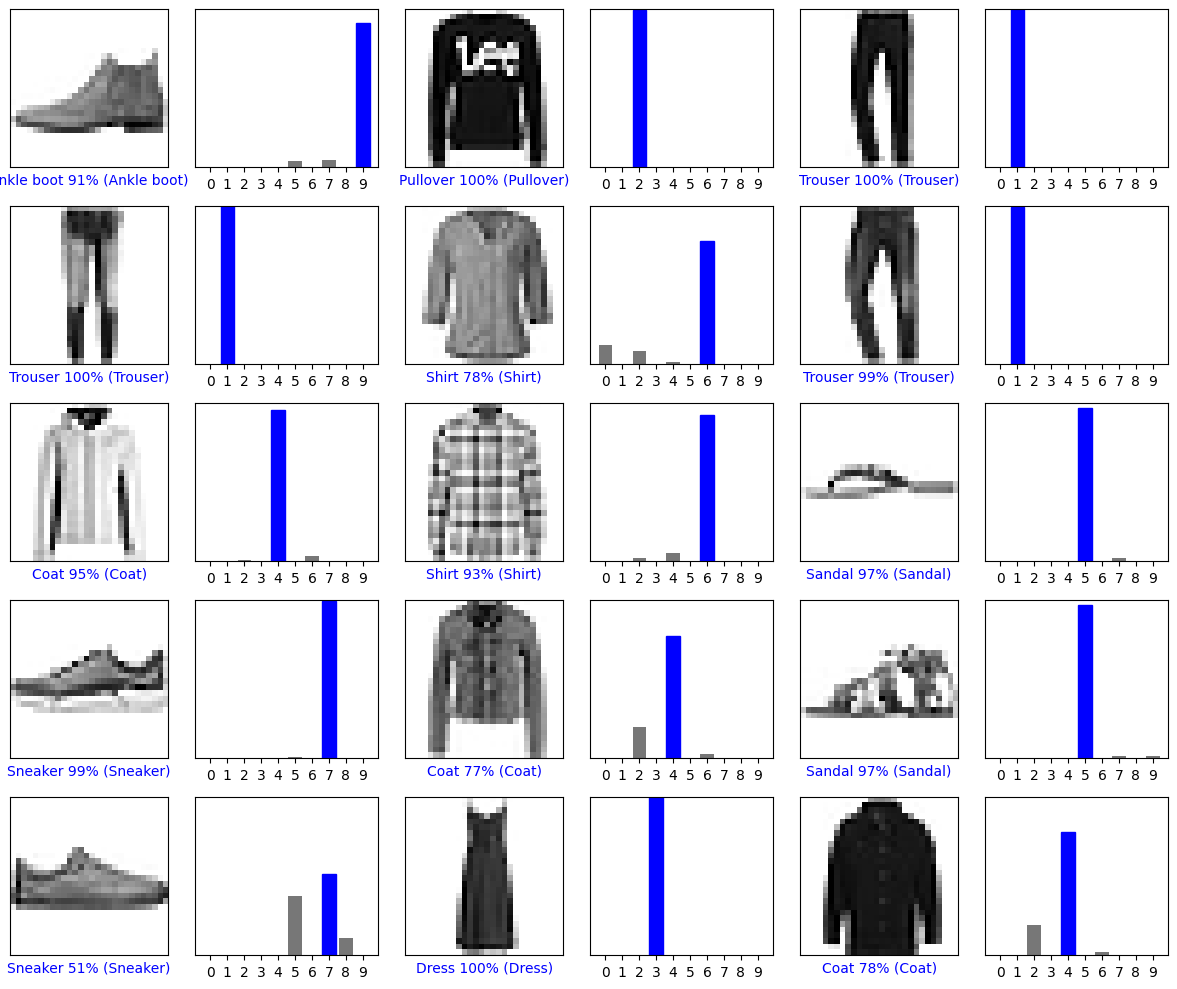

In [11]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, y_test_labels, X_test)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, y_test_labels)

plt.tight_layout()
plt.show()